In [90]:
from sklearn.datasets import load_diabetes
import pandas as pd
diabetes=load_diabetes()

df_X = diabetes.data
df_y = diabetes.target
print(df_X.shape)
print(df_y.shape)

print(dir(diabetes))
print(diabetes.feature_names)

data=pd.DataFrame(df_X,columns=diabetes.feature_names)
print(data)

# (3) train, test 데이터 분리

(442, 10)
(442,)
['DESCR', 'data', 'data_filename', 'data_module', 'feature_names', 'frame', 'target', 'target_filename']
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215 

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, 
                                                    df_y, 
                                                    test_size=0.2, 
                                                    random_state=7)
print(X_train.shape)
print(X_test.shape)

(353, 10)
(89, 10)


In [92]:

# from sklearn.linear_model import LinearRegression
# clf = LinearRegression()
# clf.fit(X_train, y_train)
# print('train score',clf.score(X_train, y_train))
# print(clf.score(X_test, y_test))

# y_pred = clf.predict(X_test)

# print(y_pred)

(5) 모델 준비하기
입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
모델 함수를 구현해주세요.


In [93]:

def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions





(6) 손실함수 loss 정의하기
손실함수를 MSE 함수로 정의해주세요.


In [94]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L



(7) 기울기를 구하는 gradient 함수 구현하기
기울기를 계산하는 gradient 함수를 구현해주세요.

In [95]:


def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

# dW, db = gradient(X, W, b, y)
# print("dW:", dW)
# print("db:", db)


(8) 하이퍼 파라미터인 학습률 설정하기
학습률, learning rate 를 설정해주세요
만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [103]:
LEARNING_RATE = 0.02


(9) 모델 학습하기
정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.


In [97]:
import numpy as np
W = np.random.rand(10)
b = np.random.rand()

In [98]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 25222.9996
Iteration 20 : Loss 21580.6551
Iteration 30 : Loss 18584.8678
Iteration 40 : Loss 16118.8024
Iteration 50 : Loss 14086.8446
Iteration 60 : Loss 12410.7403
Iteration 70 : Loss 11026.4370
Iteration 80 : Loss 9881.5012
Iteration 90 : Loss 8933.0051
Iteration 100 : Loss 8145.7982
Iteration 110 : Loss 7491.0936
Iteration 120 : Loss 6945.3116
Iteration 130 : Loss 6489.1337
Iteration 140 : Loss 6106.7284
Iteration 150 : Loss 5785.1182
Iteration 160 : Loss 5513.6622
Iteration 170 : Loss 5283.6314
Iteration 180 : Loss 5087.8630
Iteration 190 : Loss 4920.4760
Iteration 200 : Loss 4776.6396
Iteration 210 : Loss 4652.3832
Iteration 220 : Loss 4544.4408
Iteration 230 : Loss 4450.1239
Iteration 240 : Loss 4367.2175
Iteration 250 : Loss 4293.8948
Iteration 260 : Loss 4228.6476
Iteration 270 : Loss 4170.2287
Iteration 280 : Loss 4117.6060
Iteration 290 : Loss 4069.9231
Iteration 300 : Loss 4026.4691
Iteration 310 : Loss 3986.6517
Iteration 320 : Loss 3949.9773
Iteration 


(10) test 데이터에 대한 성능 확인하기
test 데이터에 대한 성능을 확인해주세요.

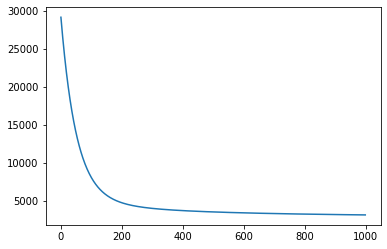

In [99]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [100]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2862.975878841352

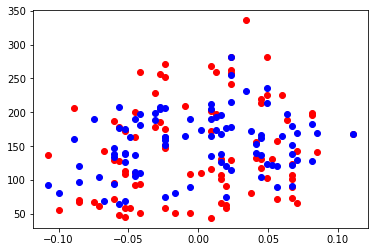

In [101]:
plt.scatter(X_test[:, 0], y_test,color='red')
plt.scatter(X_test[:, 0], prediction,color='blue')
plt.show()